In [1]:
print('This is a code for Logistic Regression for imbalanced dataset')

This is a code for Logistic Regression for imbalanced dataset


Generate and plot a synthetic imbalanced classification dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from collections import Counter
from sklearn.datasets import make_classification

Imbalanced Dataset

In [4]:
X,y  = make_classification(n_samples=10000, n_classes=2, weights=[0.99,0.01], random_state=1)

In [5]:
X

array([[-0.23629978, -1.05493612, -0.43290515, ..., -0.3493208 ,
        -1.11850064,  0.3847425 ],
       [ 0.19173349, -2.3689596 , -0.49565017, ...,  0.18279077,
         0.21356147,  0.49222565],
       [ 0.26559616, -0.53611925, -0.14163292, ...,  0.62926365,
         1.07755487,  0.94463163],
       ...,
       [-0.69998136,  1.32415374, -0.85002558, ..., -0.22088742,
         2.72373949, -0.48296092],
       [ 1.74253803,  0.32763222, -0.43618563, ..., -0.29079439,
         0.37285878, -0.39378543],
       [-0.81545439,  0.04712317, -0.63314742, ..., -0.0127121 ,
         0.82512065,  1.30908699]])

In [6]:
Counter(y)

Counter({0: 9840, 1: 160})

<Axes: xlabel='0', ylabel='1'>

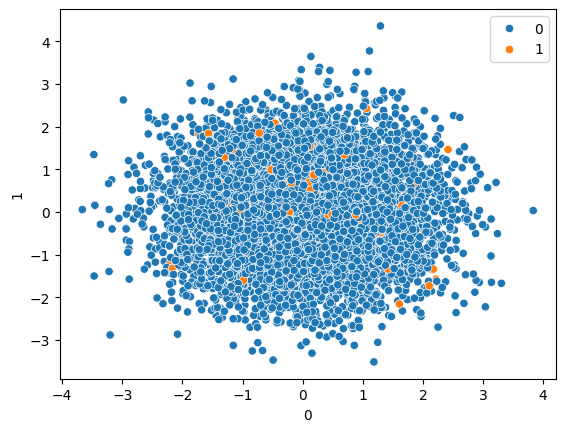

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

Spliting the dataset into training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train = train_test_split(X,y,test_size=0.3,random_state=1)

Hyperparameter training tuning

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weights = [{0:w,1:y} for w in [1,10,100,1000] for y in [1,10,100,1000]]

In [17]:
params = dict(penalty=penalty, class_weight=class_weights, C=c_values, solver=solver)

In [18]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 100},
  {0: 1, 1: 1000},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 100},
  {0: 10, 1: 1000},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 100},
  {0: 100, 1: 1000},
  {0: 1000, 1: 1},
  {0: 1000, 1: 10},
  {0: 1000, 1: 100},
  {0: 1000, 1: 1000}],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

applying Grid and StratifiedFold 

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
v= StratifiedKFold()
grid = GridSearchCV(estimator=model, scoring='accuracy', param_grid=params, cv=v)

In [ ]:
grid.fit(X_train,y_train)